POST ELECTION ANALYSIS TO SEE WHY TRUMP WAS ELECTED
ANALYZING THE DEMOGRAPHIC USING DECISION TREES

In [23]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
def pres_winner_2016(row):
    return 1 if row['clinton16']>row['trump16'] else 0

In [3]:
path = 'C:\RisheePythonExamples\election-context-2018.csv'
data = pd.read_csv(path)
data['Pres_Winner_16'] = data.apply(lambda row: pres_winner_2016(row), axis=1)
data = data.drop(['demgov16','repgov16','othergov16'], axis = 1)

'data' CONTAINS ALL THE RESULTS OF THE PRESEDENTIAL CAMPAIGN

In [4]:
from sklearn import tree
classifr = tree.DecisionTreeClassifier()
trainingSet = data.iloc[:,20:]
trainingSet = trainingSet.dropna()
x = trainingSet.iloc[:,:-1]
y = trainingSet.iloc[:,-1:]
x_train,  x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size = 0.5, random_state = 25)
classifr = classifr.fit(x_train,y_train)
classifr.score(x_test, y_test)
#classifr


0.8958868894601543

MAKES AN OKAY CLASSIFIER, 90% IS NOT BAD. THE DECISION BETWEEN CLINTON AND TRUMP. 

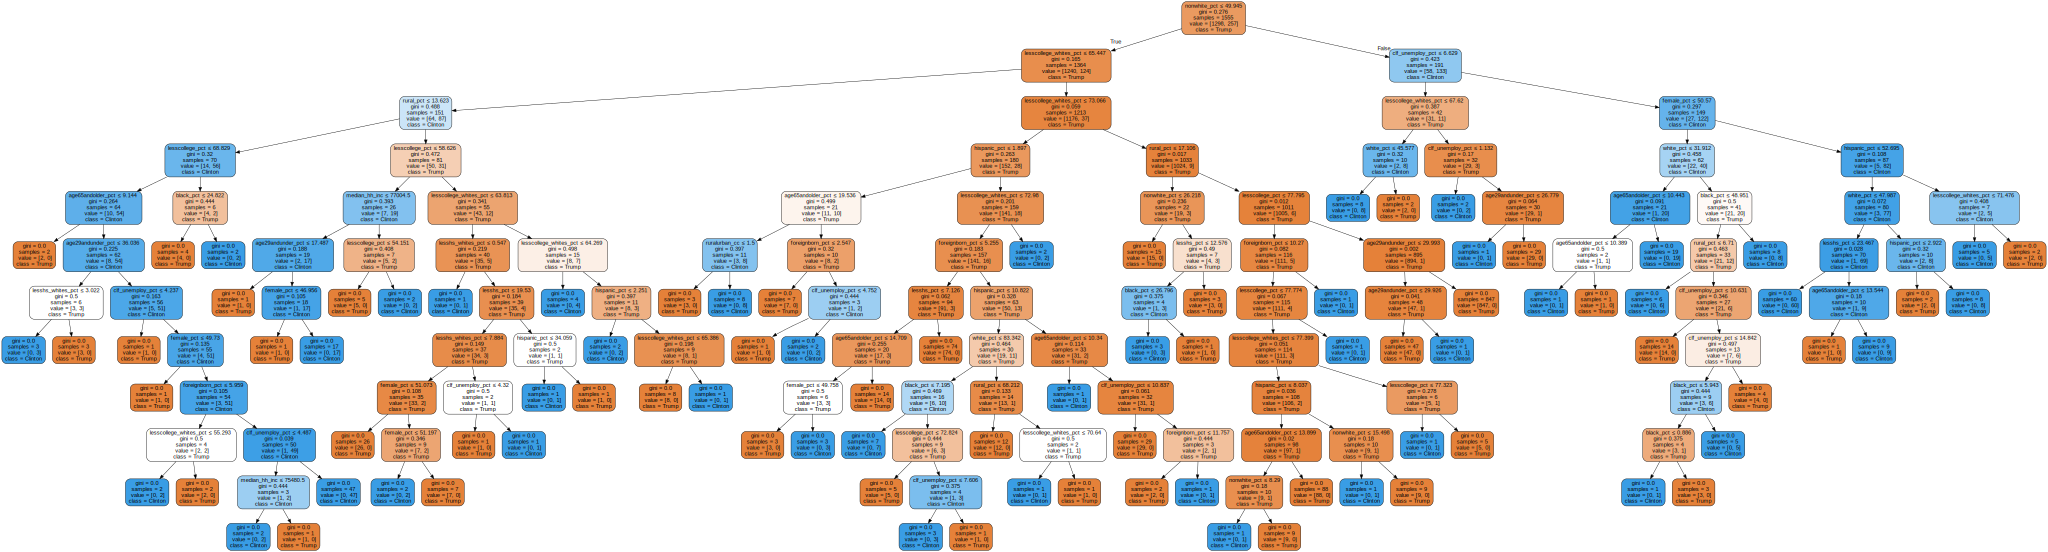

In [5]:
import graphviz
dot_data = tree.export_graphviz(classifr, out_file = None, feature_names = trainingSet.columns[:-1], class_names = ['Trump', 'Clinton'], filled = True, rounded = True, special_characters= True)
graph = graphviz.Source(dot_data)
graph.render("Election_DecTree",format = 'png')
graph

THE DECISION TREE MAKES SOME SENSE, BUT WE CAN ANALYZE IT POST-MORTEM TO FIND HOW THINGS WORK

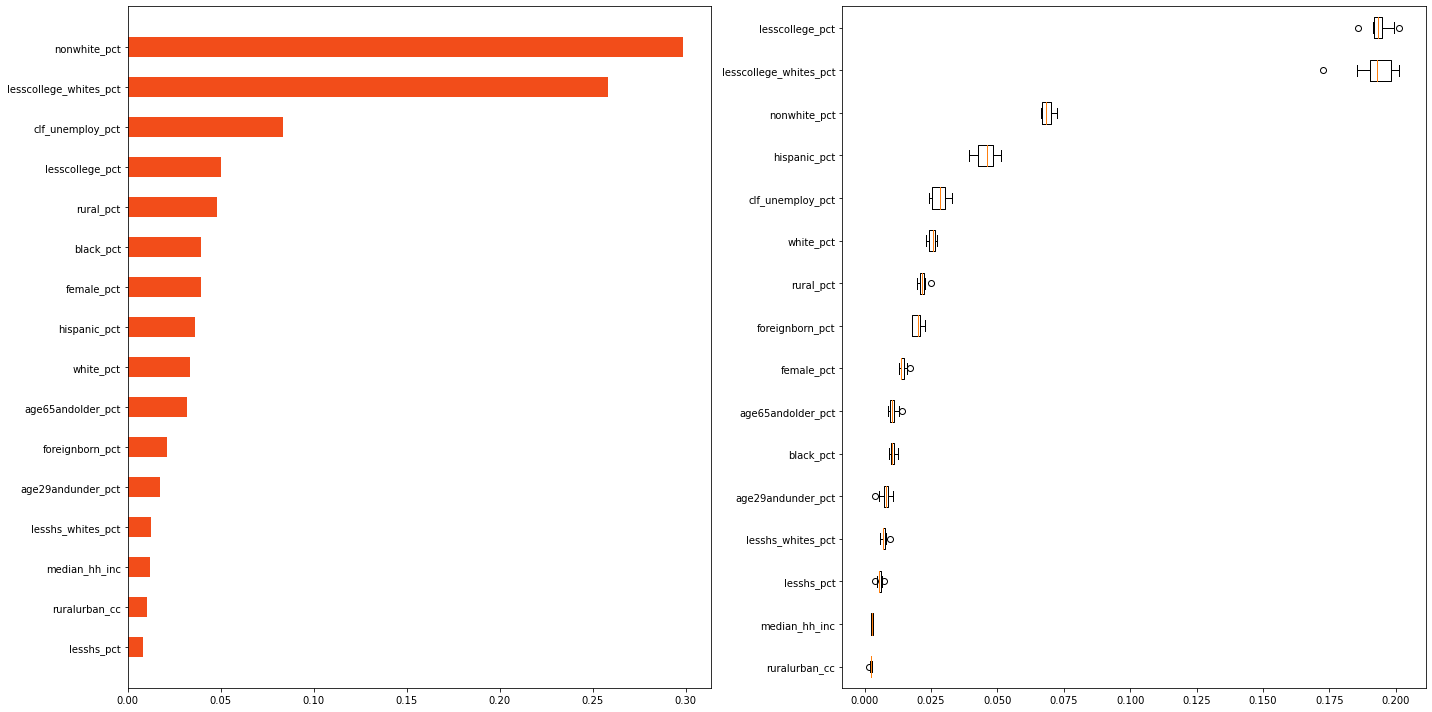

In [6]:
from sklearn.inspection import permutation_importance
decTree_permImpor_res = permutation_importance(classifr, x,y, n_repeats = 10, random_state=0)

permImpor_sort_idx = decTree_permImpor_res.importances_mean.argsort()
tree_Impor_Sorted_idx = np.argsort(classifr.feature_importances_)
tree_Indices = np.arange(0,len(classifr.feature_importances_)) + 0.5

feat_labels = trainingSet.columns[:-1]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.barh(tree_Indices,classifr.feature_importances_[tree_Impor_Sorted_idx], height = 0.5,color = (0.95,0.3,0.1))
ax1.set_yticklabels(feat_labels[tree_Impor_Sorted_idx])
ax1.set_yticks(tree_Indices)

ax2.boxplot(decTree_permImpor_res.importances[permImpor_sort_idx].T, vert = False, labels = feat_labels[permImpor_sort_idx])
fig.tight_layout()
plt.show()

THE THREE MAJOR VARIABLES THAT AFFECTED PEOPLE'S DECISIONS BETWEEN CLINTON AND TRUMP WAS BLACK%, %PEOPLE WITH LESS THAN COLLEGE, and MEDIAN HOUSEHOLD INCOME.
WE PLOT THE DECISIONS ON A 3D SCALE. 

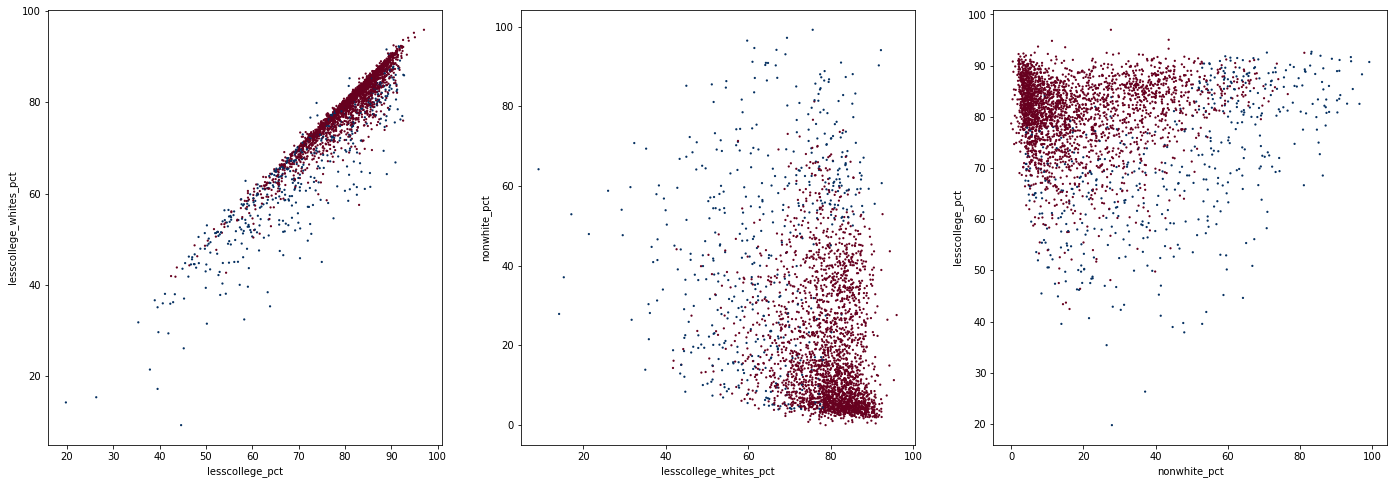

In [7]:
plt.figure(figsize=(24,8))
ax1 = plt.subplot(131)
ax1.scatter(x[feat_labels[permImpor_sort_idx[-1]]], x[feat_labels[permImpor_sort_idx[-2]]], 5, np.array(y), cmap = "RdBu",linewidths = 0)
ax1.set_ylabel(feat_labels[permImpor_sort_idx[-2]])
ax1.set_xlabel(feat_labels[permImpor_sort_idx[-1]])

ax1 = plt.subplot(132)
ax1.scatter(x[feat_labels[permImpor_sort_idx[-2]]], x[feat_labels[permImpor_sort_idx[-3]]], 5, np.array(y), cmap = "RdBu",linewidths = 0)
ax1.set_ylabel(feat_labels[permImpor_sort_idx[-3]])
ax1.set_xlabel(feat_labels[permImpor_sort_idx[-2]])

ax1 = plt.subplot(133)
ax1.scatter(x[feat_labels[permImpor_sort_idx[-3]]], x[feat_labels[permImpor_sort_idx[-1]]], 5, np.array(y), cmap = "RdBu",linewidths = 0)
ax1.set_ylabel(feat_labels[permImpor_sort_idx[-1]])
ax1.set_xlabel(feat_labels[permImpor_sort_idx[-3]])

plt.show()

WHILE THE RESULTS OF THE FIRST TWO SUBPLOTS ARE SORT OF OBVIOUS, i.e. COUNTIES WITH MAJORITY WHITE PEOPLE AND COUNTIES WITH PEOPLE HAVING LESS THAN COLLEGE DEGREE EDUCATION TEND TO VOTE FOR TRUMP. AGAIN, SOME VARIABLES SUCH AS LESSCOLLEGE_PCT and LESSCOLLEGE WHITE PCT ARE PROPERLY CORRELATED, AND PROBABLY SKEW THE DECISION MAKING PROCESS.

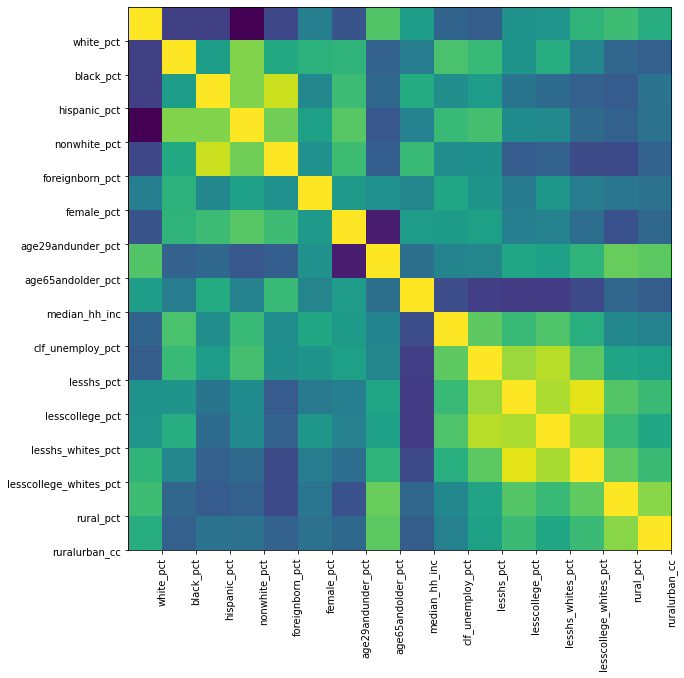

In [8]:
from scipy import stats
corr = stats.spearmanr(x).correlation
plt.figure(figsize = (10,10))
ax1 = plt.subplot(111)
ax1.imshow(corr)
ax1.set_yticklabels(feat_labels)
ax1.set_yticks(tree_Indices)
ax1.set_xticklabels(feat_labels, rotation = 'vertical')
ax1.set_xticks(tree_Indices)
plt.show()

WE SEE THAT TWO FEATURES 'lesscollege_whites_pct' AND 'foreignborn_pct' ARE CORRELATED WITH EACH OTHER A LOT. SO, WE GO AHEAD, REMOVE THESE FEATURES AND TRY THE WHOLE THING AGAIN.

In [9]:
path = 'C:\RisheePythonExamples\election-context-2018.csv'
data = pd.read_csv(path)
data['Pres_Winner_16'] = data.apply(lambda row: pres_winner_2016(row), axis=1)
data = data.drop(['demgov16','repgov16','othergov16','lesscollege_whites_pct','foreignborn_pct'], axis = 1)
from sklearn import tree
classifr = tree.DecisionTreeClassifier()
trainingSet = data.iloc[:,20:]
trainingSet = trainingSet.dropna()
x = trainingSet.iloc[:,:-1]
y = trainingSet.iloc[:,-1:]
x_train,  x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size = 0.5, random_state = 25)
classifr = classifr.fit(x_train,y_train)
classifr.score(x_test, y_test)

0.9068123393316195

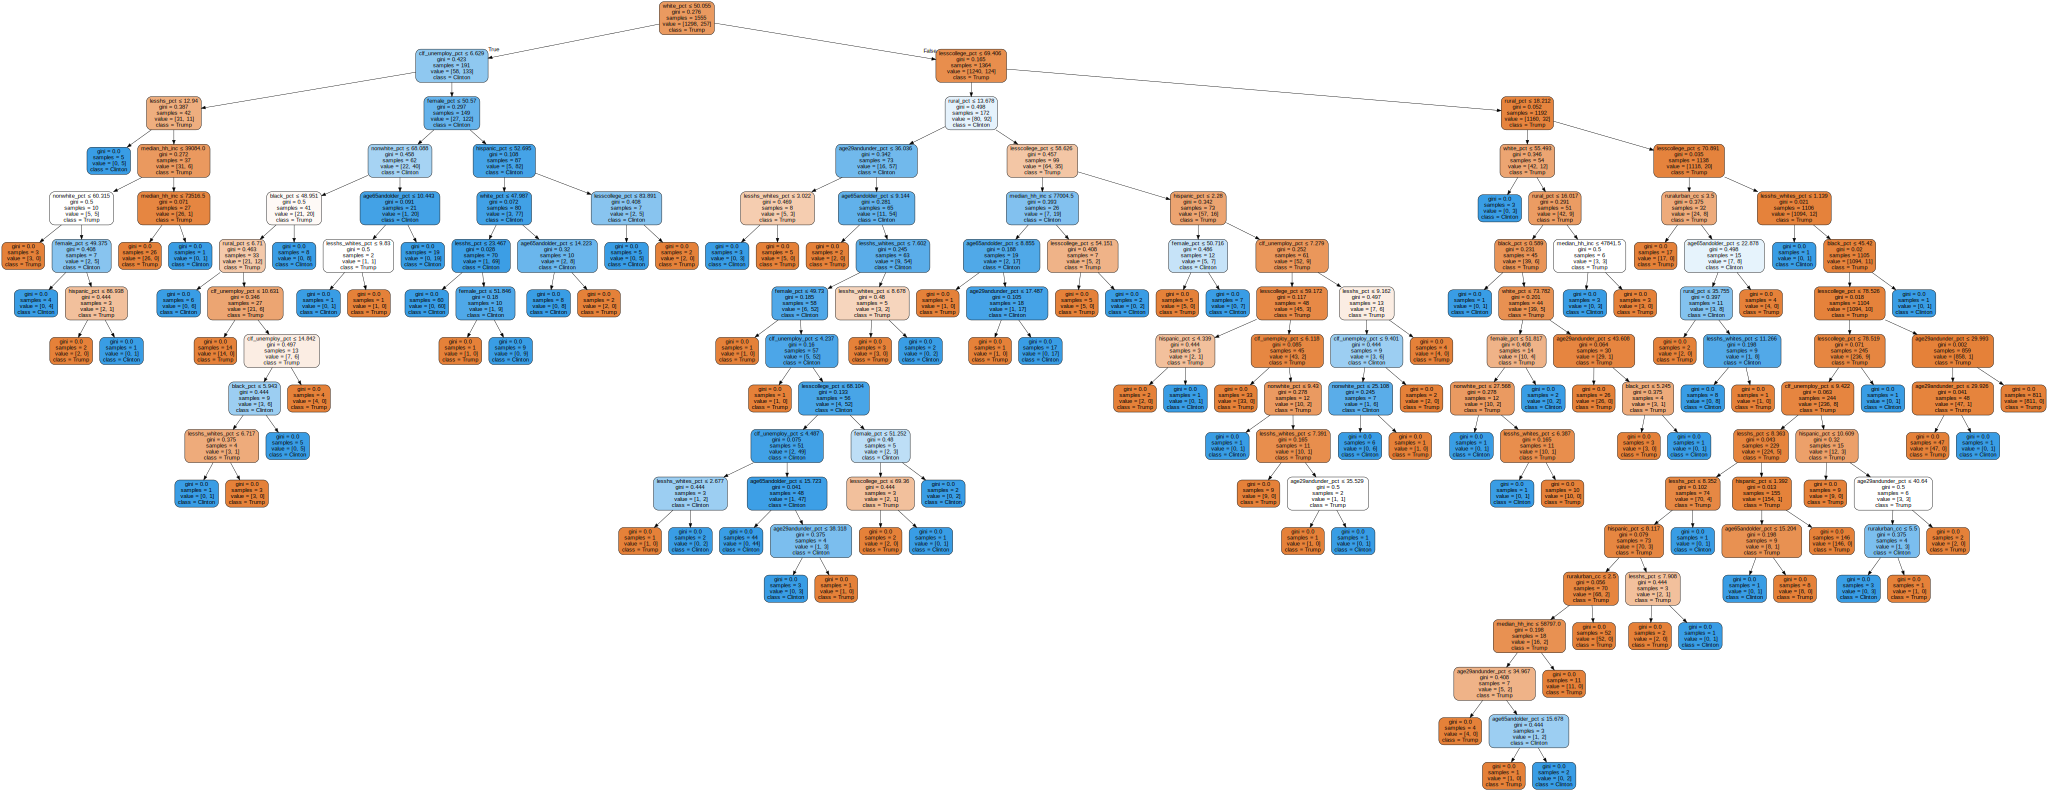

In [10]:
import graphviz
dot_data = tree.export_graphviz(classifr, out_file = None, feature_names = trainingSet.columns[:-1], class_names = ['Trump', 'Clinton'], filled = True, rounded = True, special_characters= True)
graph = graphviz.Source(dot_data)
graph.render("Election_DecTree_RemCorr",format = 'png')
graph

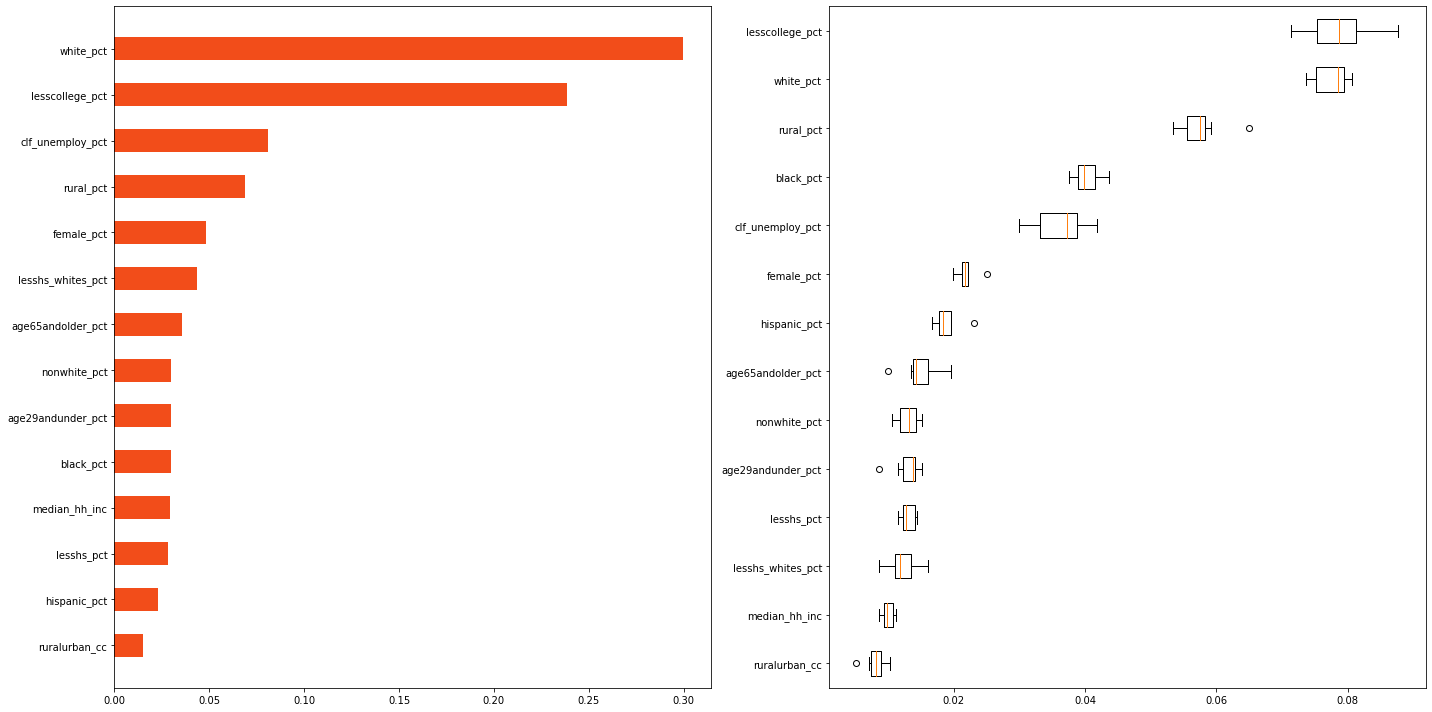

In [11]:
from sklearn.inspection import permutation_importance
decTree_permImpor_res = permutation_importance(classifr, x,y, n_repeats = 10, random_state=0)

permImpor_sort_idx = decTree_permImpor_res.importances_mean.argsort()
tree_Impor_Sorted_idx = np.argsort(classifr.feature_importances_)
tree_Indices = np.arange(0,len(classifr.feature_importances_)) + 0.5

feat_labels = trainingSet.columns[:-1]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.barh(tree_Indices,classifr.feature_importances_[tree_Impor_Sorted_idx], height = 0.5,color = (0.95,0.3,0.1))
ax1.set_yticklabels(feat_labels[tree_Impor_Sorted_idx])
ax1.set_yticks(tree_Indices)

ax2.boxplot(decTree_permImpor_res.importances[permImpor_sort_idx].T, vert = False, labels = feat_labels[permImpor_sort_idx])
fig.tight_layout()
plt.show()

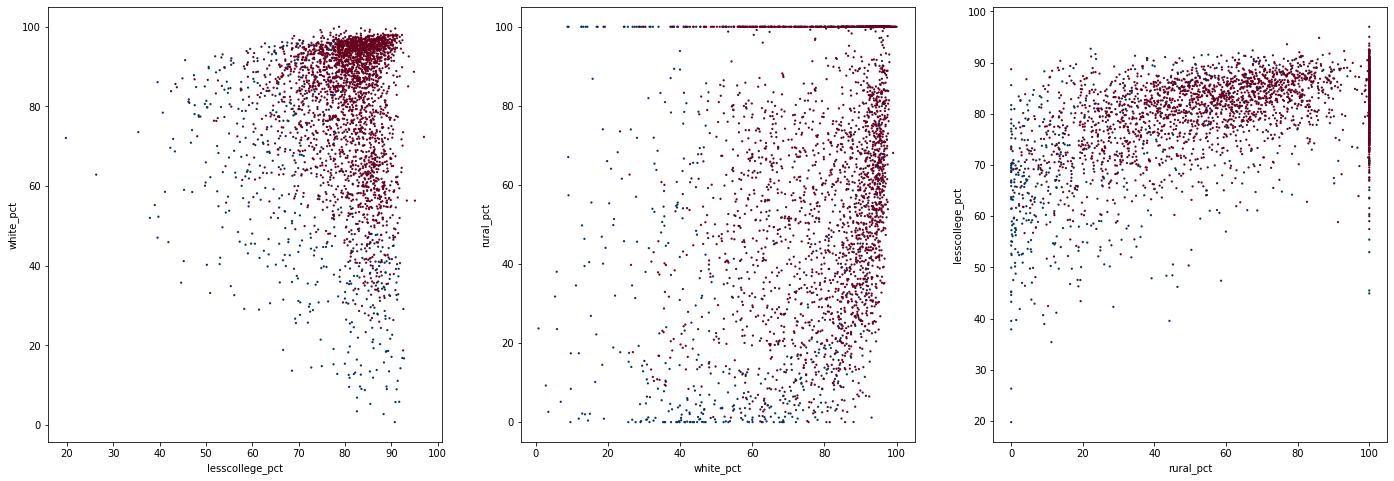

In [12]:
plt.figure(figsize=(24,8))
ax1 = plt.subplot(131)
ax1.scatter(x[feat_labels[permImpor_sort_idx[-1]]], x[feat_labels[permImpor_sort_idx[-2]]], 5, np.array(y), cmap = "RdBu",linewidths = 0)
ax1.set_ylabel(feat_labels[permImpor_sort_idx[-2]])
ax1.set_xlabel(feat_labels[permImpor_sort_idx[-1]])

ax1 = plt.subplot(132)
ax1.scatter(x[feat_labels[permImpor_sort_idx[-2]]], x[feat_labels[permImpor_sort_idx[-3]]], 5, np.array(y), cmap = "RdBu",linewidths = 0)
ax1.set_ylabel(feat_labels[permImpor_sort_idx[-3]])
ax1.set_xlabel(feat_labels[permImpor_sort_idx[-2]])

ax1 = plt.subplot(133)
ax1.scatter(x[feat_labels[permImpor_sort_idx[-3]]], x[feat_labels[permImpor_sort_idx[-1]]], 5, np.array(y), cmap = "RdBu",linewidths = 0)
ax1.set_ylabel(feat_labels[permImpor_sort_idx[-1]])
ax1.set_xlabel(feat_labels[permImpor_sort_idx[-3]])

plt.show()

NOW THE RESULTS FROM ALL THREE SUBPLOTS ARE SORT OF OBVIOUS, i.e. RURAL COUNTIES, COUNTIES WITH MAJORITY WHITE PEOPLE, AND COUNTIES WITH PEOPLE HAVING LESS THAN COLLEGE DEGREE EDUCATION TEND TO VOTE FOR TRUMP.

NOW WE TRY AND SEE IF THERE ARE ANY ANTI TRUMP VOTERS!

In [13]:
path = 'C:\RisheePythonExamples\election-context-2018.csv'
data = pd.read_csv(path)
index_drops = data[(np.isnan(data['demsen16']) | np.isnan(data['demhouse16']))].index
data = data.drop(index_drops, axis = 0)
data = data.drop(['demgov16','repgov16','othergov16','lesscollege_whites_pct','foreignborn_pct'], axis = 1)

def affiliation2016(row):
    retVal = 0
    rv_Pres = 0
    rv_Sen = 0
    rv_Hou = 0
    if row['clinton16'] > row['trump16']:
        rv_Pres = 1
    if row['demsen16'] > row['repsen16']:
        rv_Sen = 10
    if row['demhouse16'] > row['rephouse16']:
        rv_Hou = 100    

    retVal = rv_Pres + rv_Sen + rv_Hou
    retVal2 = 0
    if retVal == 0:
        retVal2 = 0
    if retVal == 1:
        retVal2 = 1
    if retVal == 10:
        retVal2 = 2
    if retVal == 11:
        retVal2 = 3
    if retVal == 100:
        retVal2 = 4
    if retVal == 101:
        retVal2 = 5
    if retVal == 110:
        retVal2 = 6
    if retVal == 111:
        retVal2 = 7                    
    return retVal2

data['Affiliation2016'] = data.apply(lambda row: affiliation2016(row), axis=1)

#data

In [14]:
#index_drops = data[data['Affiliation2016'] == 7].index
#data_RepVot = data.drop(index_drops, axis = 0)

def repAffil2016(row):
    retVal = 0
    if(row['Affiliation2016'] == 0):
        retVal = 1
    if(row['Affiliation2016'] == 7):
        retVal = 2
    if(row['Affiliation2016'] == 1):
        retVal = 3
    if(row['Affiliation2016'] == 6):
        retVal = 4

    retVal2 = 0
    if retVal == 3:
        retVal2 = 1
    return retVal2

data_RepVot['Repub2016'] = data_RepVot.apply(lambda row: repAffil2016(row), axis=1)

trainingSet = data_RepVot.iloc[:,20:]
trainingSet = trainingSet.dropna()
x = trainingSet.iloc[:,:-2]
y = trainingSet.iloc[:,-1:]
x_train,  x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size = 0.8, random_state = 25)
classifr = tree.DecisionTreeClassifier()
classifr = classifr.fit(x_train,y_train)
n_samples, n_features = x.shape
classifr.score(x_test, y_test)
#n_neighbors = 30

NameError: name 'data_RepVot' is not defined

In [ ]:
import graphviz
#dot_data = tree.export_graphviz(classifr, out_file = None, feature_names = trainingSet.columns[:-2], class_names = ['Mixed','All Repub','All Dem','Anti Trump', 'Anti Clinton'], filled = True, rounded = True, special_characters= True)
dot_data = tree.export_graphviz(classifr, out_file = None, feature_names = trainingSet.columns[:-2], class_names = ['Others','Anti Trump'], filled = True, rounded = True, special_characters= True)
graph = graphviz.Source(dot_data)
graph.render("Election_DecTree",format = 'png')
graph

In [ ]:
from sklearn.inspection import permutation_importance
decTree_permImpor_res = permutation_importance(classifr, x,y, n_repeats = 10, random_state=0)

permImpor_sort_idx = decTree_permImpor_res.importances_mean.argsort()
tree_Impor_Sorted_idx = np.argsort(classifr.feature_importances_)
tree_Indices = np.arange(0,len(classifr.feature_importances_)) + 0.5

feat_labels = trainingSet.columns[:-1]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.barh(tree_Indices, classifr.feature_importances_[tree_Impor_Sorted_idx], height = 0.5,color = (0.95,0.3,0.1))
ax1.set_yticklabels(feat_labels[tree_Impor_Sorted_idx])
ax1.set_yticks(tree_Indices)

ax2.boxplot(decTree_permImpor_res.importances[permImpor_sort_idx].T, vert = False, labels = feat_labels[permImpor_sort_idx])
fig.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(25,10))
ax1 = plt.subplot(131)
ax1.scatter(x[feat_labels[permImpor_sort_idx[-1]]], x[feat_labels[permImpor_sort_idx[-2]]], (np.array(y)*4+1)*5, np.array(y), cmap = "RdBu",linewidths = 0)
ax1.set_ylabel(feat_labels[permImpor_sort_idx[-2]])
ax1.set_xlabel(feat_labels[permImpor_sort_idx[-1]])

ax1 = plt.subplot(132)
ax1.scatter(x[feat_labels[permImpor_sort_idx[-2]]], x[feat_labels[permImpor_sort_idx[-3]]], (np.array(y)*4+1)*5, np.array(y), cmap = "RdBu",linewidths = 0)
ax1.set_ylabel(feat_labels[permImpor_sort_idx[-3]])
ax1.set_xlabel(feat_labels[permImpor_sort_idx[-2]])

ax1 = plt.subplot(133)
ax1.scatter(x[feat_labels[permImpor_sort_idx[-3]]], x[feat_labels[permImpor_sort_idx[-1]]], (np.array(y)*4+1)*5, np.array(y), cmap = "RdBu",linewidths = 0)
ax1.set_ylabel(feat_labels[permImpor_sort_idx[-1]])
ax1.set_xlabel(feat_labels[permImpor_sort_idx[-3]])

plt.show()

In [ ]:
path = 'C:\RisheePythonExamples\election-context-2018.csv'
data = pd.read_csv(path)
index_drops = data[(np.isnan(data['demsen16']) | np.isnan(data['demhouse16']))].index
data = data.drop(index_drops, axis = 0)
data = data.drop(['demgov16','repgov16','othergov16','lesscollege_whites_pct','foreignborn_pct'], axis = 1)

data['Affiliation2016'] = data.apply(lambda row: affiliation2016(row), axis=1)
data_RepVot['Repub2016'] = data_RepVot.apply(lambda row: repAffil2016(row), axis=1)

trainingSet = data_RepVot.iloc[:,20:]
trainingSet = trainingSet.dropna()
x = trainingSet.iloc[:,:-2]
y = trainingSet.iloc[:,-1:]

classifr_PCA = sklearn.decomposition.TruncatedSVD(n_components=2)
X_pca = classifr_PCA.fit_transform(x)

In [ ]:
x_min, x_max = np.min(X_pca, 0), np.max(X_pca, 0)
X_pca_Norm = (X_pca - x_min) / (x_max - x_min)
plt.figure(figsize = (12,10))
plt.scatter(X_pca_Norm[:, 0], X_pca_Norm[:, 1], (np.array(y)*4+1)*5, np.array(y), cmap = "RdBu",linewidths = 0)
plt.colorbar()

In [ ]:
path = 'C:\RisheePythonExamples\election-context-2018.csv'
data = pd.read_csv(path)
index_drops = data[(np.isnan(data['demsen16']) | np.isnan(data['demhouse16']))].index
data = data.drop(index_drops, axis = 0)
data = data.drop(['demgov16','repgov16','othergov16','lesscollege_whites_pct','foreignborn_pct'], axis = 1)

data['Affiliation2016'] = data.apply(lambda row: affiliation2016(row), axis=1)
data_RepVot['Repub2016'] = data_RepVot.apply(lambda row: repAffil2016(row), axis=1)

trainingSet = data_RepVot.iloc[:,20:]
trainingSet = trainingSet.dropna()
x = trainingSet.iloc[:,:-2]
y = trainingSet.iloc[:,-1:]

from sklearn import manifold

tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(x)

In [ ]:
x_min, x_max = np.min(X_tsne, 0), np.max(X_tsne, 0)
X_tsne_Norm = (X_tsne - x_min) / (x_max - x_min)

plt.figure(figsize = (12,10))
plt.scatter(X_tsne_Norm[:, 0], X_tsne_Norm[:, 1], (np.array(y)*4+1)*5, np.array(y), cmap = "RdBu",linewidths = 0)
plt.colorbar()

In [38]:
path = 'C:\RisheePythonExamples\election-context-2018.csv'
data = pd.read_csv(path)

print(np.ceil(1000 * np.asarray(data['white_pct'])).astype(int))

new_data = data[data['demsen16'].notna() & data['demhouse16'].notna() & data['trump16'].notna()]

[75684 83179 45886 ... 87719 82398 92223]


In [39]:
def president_winner_2016(cur_row):
    return 1 if cur_row['trump16'] > cur_row['clinton16'] else 0

def house_winner_2016(cur_row):
    return 1 if cur_row['rephouse16'] > cur_row['demhouse16'] else 0

def senate_winner_2016(cur_row):
    return 1 if cur_row['repsen16'] > cur_row['demsen16'] else 0

 
president_winner = np.asarray(new_data.apply(lambda row: president_winner_2016(row), axis = 1))
house_winner = np.asarray(new_data.apply(lambda row: house_winner_2016(row), axis = 1))
senate_winner = np.asarray(new_data.apply(lambda row: senate_winner_2016(row), axis = 1))

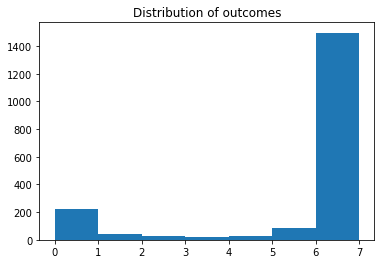

In [28]:
# Create labels for corresponding outcome (encoding style: president, senate, house) 

## Encoding Table ##
# 000 = 0  (dem takes all) 
# 001 = 1 (rep takes house, dem takes the rest)
# 010 = 2 (rep takes senate, dem takes the rest)
# 011 = 3 (dem takes president, rep takes the rest)
# 100 = 4 (rep takes president, dem takes the rest)
# 101 = 5 (dem takes senate, rep takes the rest)
# 110 = 6 (dem takes house, rep takes the rest)
# 111 = 7 (rep takes all)

winner_encode = 4 * president_winner + 2 * senate_winner + house_winner

_ = plt.hist(winner_encode, bins = [0, 1, 2, 3, 4, 5, 6, 7])  # arguments are passed to np.histogram
plt.title("Distribution of outcomes")
plt.show()

(1918, 14)


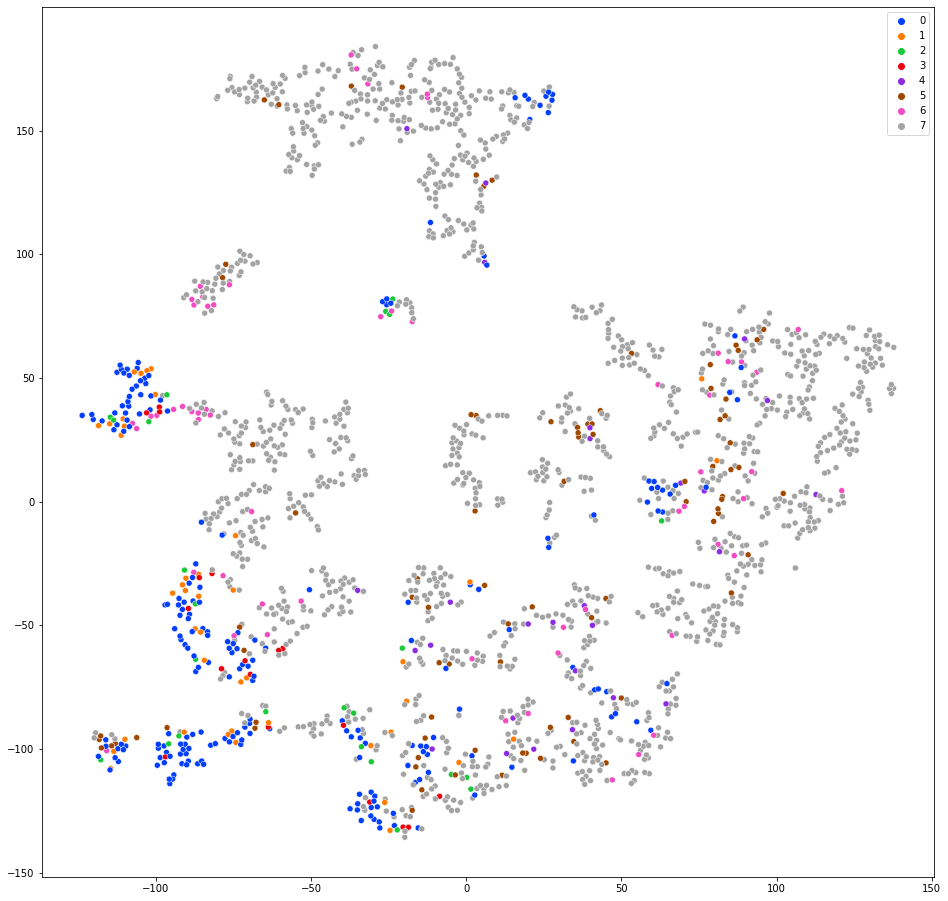

In [30]:
new_data.dropna()
working_copy = np.asarray(new_data[['white_pct', 'black_pct', 'hispanic_pct', 'nonwhite_pct', 'foreignborn_pct', 'age29andunder_pct', 'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct', 'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct', 'rural_pct']])

working_copy = np.rint(10000000.0 * working_copy).astype(int)

print(np.shape(working_copy))

import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE

data_embedded = TSNE(n_components = 2, n_iter = 20000, perplexity = 15, learning_rate = 800.0).fit_transform(working_copy)
data_embedded.shape



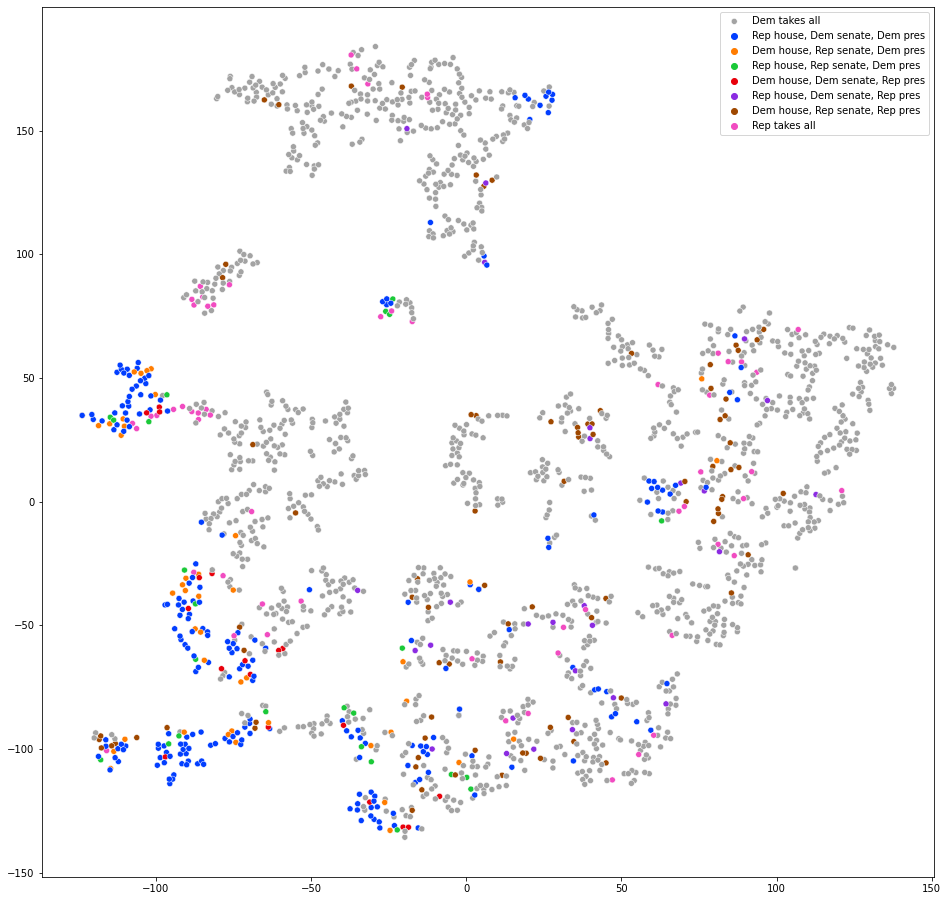

In [35]:
palette = sns.color_palette("bright", 8)
plt.figure(figsize=(16, 16))
sns.scatterplot(x = data_embedded[:,0], y = data_embedded[:,1], hue = winner_encode, legend = 'full', palette = palette)
plt.legend(labels = ['Dem takes all', 'Rep house, Dem senate, Dem pres', 'Dem house, Rep senate, Dem pres', 'Rep house, Rep senate, Dem pres', 'Dem house, Dem senate, Rep pres', 'Rep house, Dem senate, Rep pres', 'Dem house, Rep senate, Rep pres', 'Rep takes all'])
plt.show()

In [41]:
path = 'C:\RisheePythonExamples\election-context-2018.csv'
data = pd.read_csv(path)

print(np.ceil(1000 * np.asarray(data['white_pct'])).astype(int))

new_data = data[data['trump16'].notna()]

president_winner = np.asarray(new_data.apply(lambda row: president_winner_2016(row), axis = 1))

new_data.dropna()
working_copy = np.asarray(new_data[['white_pct', 'black_pct', 'hispanic_pct', 'nonwhite_pct', 'foreignborn_pct', 'age29andunder_pct', 'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct', 'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct', 'rural_pct']])

working_copy = np.rint(10000000.0 * working_copy).astype(int)

print(np.shape(working_copy))

data_embedded = TSNE(n_components = 2, n_iter = 20000, perplexity = 15, learning_rate = 800.0).fit_transform(working_copy)
data_embedded.shape



[75684 83179 45886 ... 87719 82398 92223]
(3114, 14)


ValueError: The palette list has the wrong number of colors.

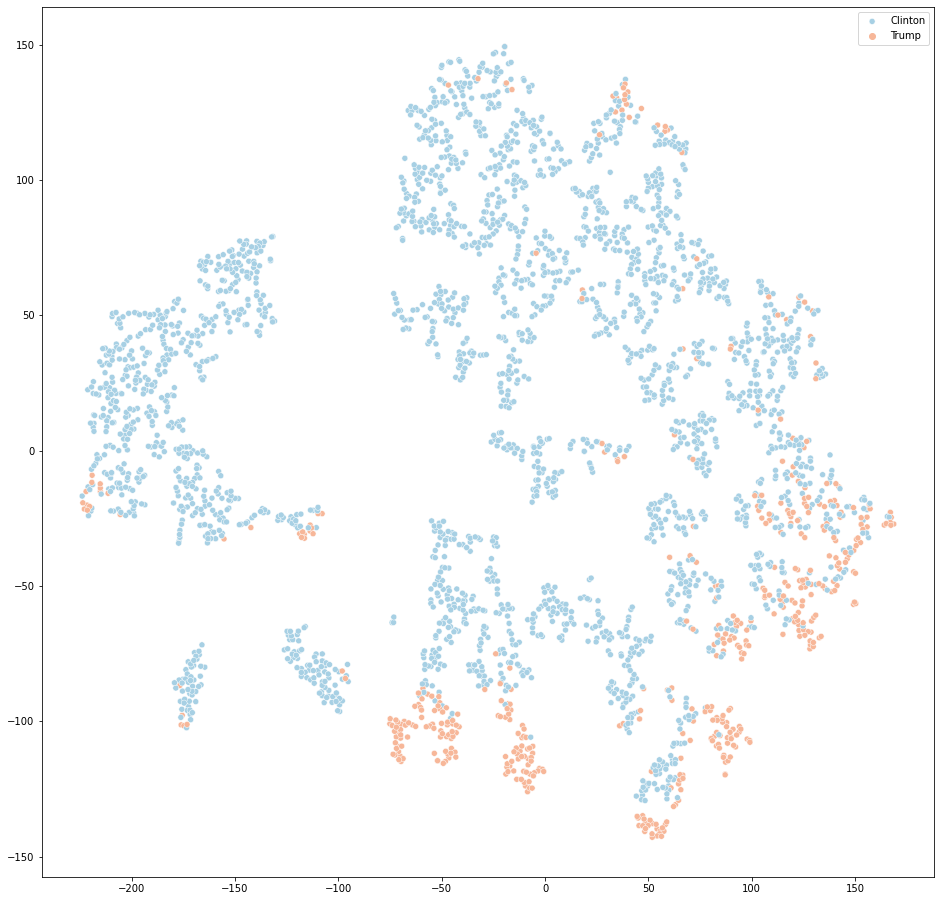

In [51]:
palette = sns.color_palette("RdBu", 2)
plt.figure(figsize=(16, 16))
sns.scatterplot(x = data_embedded[:,0], y = data_embedded[:,1], hue = president_winner, legend = 'full', palette = palette)
plt.legend(labels = ['Clinton','Trump'])
plt.show()

In [43]:
np.size(data_embedded[:,0])

3114

In [44]:
np.size(president_winner)

3114